In [2]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:

encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 


OneHotEncoder()

In [4]:

data = []
paths = []
result = []

for r, d, f in os.walk(r'C:\Users\kalle\Desktop\yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [5]:

paths = []
for r, d, f in os.walk(r'C:\Users\kalle\Desktop\no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [6]:
#
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [7]:

result = np.array(result)
result = result.reshape(139,2)

In [8]:

x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=42)

In [9]:
x_train

array([[[[ 36,  32,  33],
         [ 36,  32,  33],
         [ 37,  33,  34],
         ...,
         [ 96,  96,  97],
         [128, 128, 128],
         [ 93,  93,  95]],

        [[ 35,  31,  32],
         [ 36,  32,  33],
         [ 37,  33,  34],
         ...,
         [153, 152, 156],
         [198, 197, 201],
         [100,  99, 102]],

        [[ 35,  31,  32],
         [ 36,  32,  33],
         [ 37,  33,  34],
         ...,
         [135, 133, 136],
         [132, 130, 132],
         [115, 113, 115]],

        ...,

        [[ 35,  31,  32],
         [ 36,  32,  33],
         [ 37,  33,  34],
         ...,
         [ 41,  39,  40],
         [ 43,  40,  41],
         [ 39,  37,  38]],

        [[ 35,  31,  32],
         [ 36,  32,  33],
         [ 37,  33,  34],
         ...,
         [ 42,  40,  41],
         [ 42,  40,  41],
         [ 39,  37,  38]],

        [[ 35,  31,  32],
         [ 36,  32,  33],
         [ 37,  33,  34],
         ...,
         [ 39,  37,  38],
        

In [10]:

model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [11]:
#
y_train.shape

(111, 2)

In [12]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/10
3/3 [==============================] - 4s 1s/step - loss: 15.0164 - val_loss: 111.1488
Epoch 2/10
3/3 [==============================] - 2s 612ms/step - loss: 29.2120 - val_loss: 15.1092
Epoch 3/10
3/3 [==============================] - 2s 620ms/step - loss: 11.3183 - val_loss: 12.8013
Epoch 4/10
3/3 [==============================] - 2s 583ms/step - loss: 6.2502 - val_loss: 74.3830
Epoch 5/10
3/3 [==============================] - 2s 619ms/step - loss: 4.6045 - val_loss: 50.9229
Epoch 6/10
3/3 [==============================] - 1s 475ms/step - loss: 1.8085 - val_loss: 9.0203
Epoch 7/10
3/3 [==============================] - 2s 577ms/step - loss: 0.9235 - val_loss: 2.7744
Epoch 8/10
3/3 [==============================] - 2s 539ms/step - loss: 1.1454 - val_loss: 2.3874
Epoch 9/10
3/3 [==============================] - 2s 562ms/step - loss: 1.1727 - val_loss: 2.7377
Epoch 10/10
3/3 [==============================] - 2s 651ms/step - loss: 0.4746 - val_loss: 9.3983


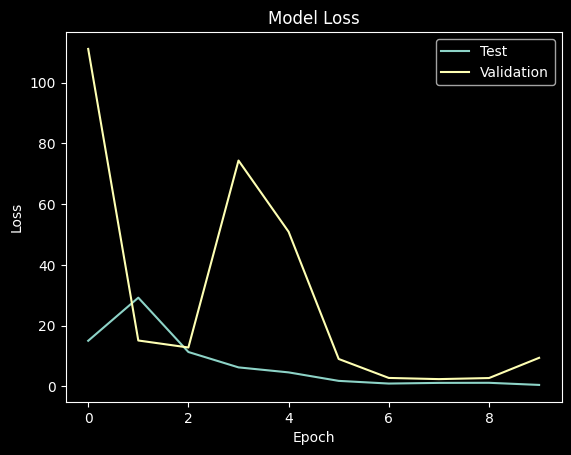

In [13]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [14]:

def names(number):
    if number==0:
        return 'Tumor'
    else:
        return 'No tumor'

100.0% Confidence There Is No tumor


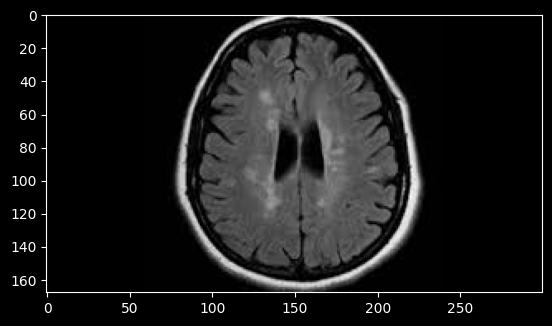

In [15]:

from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\kalle\Desktop\brain_tumor_dataset\no\13 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence There Is ' + names(classification))

100.0% Confidence This Is A Tumor


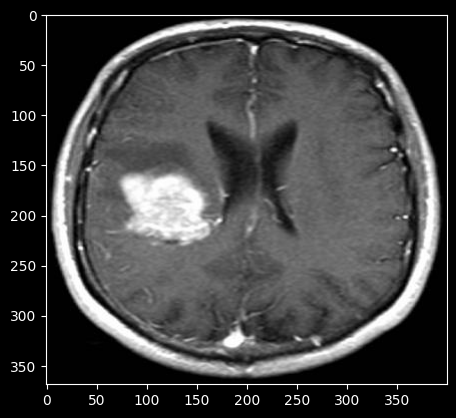

In [16]:

from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\kalle\Desktop\yes\Y11.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

In [17]:
model.save("braintumor.h5")

In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import keras
import numpy
#load the trained model to classify sign
from keras.models import load_model
model = keras.models.load_model("D:/New folder/braintumor.h5")

#dictionary to label all traffic signs class.
classes = { 1:'Tumor',
            2:'No Tumor',      
             }
                 
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('IMAGE RECOGNITION')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((128,128))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    print(image.shape)
    res = model.predict_on_batch(image)
    pred = numpy.argmax(model.predict(image)[0])
    #pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    RESULT=str(res[0][classification]*100) + '% Confidence This Is A ' + sign
    
    print(str(res[0][classification]*100) + '% Confidence This Is A ' + sign)
    #print(sign)
    label.configure(foreground='#011638', text=RESULT) 
   

def show_classify_button(file_path):
    classify_b=Button(top,text="RECOGNIZE IMAGE",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="UPLOAD IMAGE",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Brain Tumor Classification",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()